In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a. caricare i dati in un dataframe

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


b. visualizzare i dati

In [ ]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c. eliminare dal dataframe tutti i record con valori NaN

In [ ]:
df.dropna(inplace = True)
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


d. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero

In [ ]:
df2 = df.groupby("Language")["Name of the show"].count().sort_values(ascending = False)
df2

Language
English     155
Hindi        17
Japanese      7
Suomi         1
Spanish       1
Deutsch       1
Name: Name of the show, dtype: int64

e. visualizzare il grafico a barre verticali dei dati precedenti

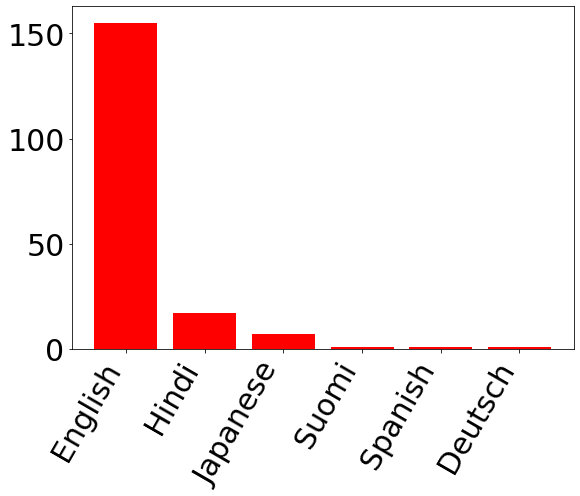

In [ ]:
#  crea la figura
fig = plt.figure(figsize=(9,7))

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(df2.index, df2.values, color="red")

fig.autofmt_xdate(rotation=60)

plt.show()

f.  visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta

([<matplotlib.patches.Wedge at 0x7ff589dceed0>,
 [Text(-0.4943075057707951, -0.9826800546152626, 'English'),
  Text(0.6557458451007981, 0.8831746071038502, 'Hindi'),
  Text(0.2447731510680483, 1.0724206751626055, 'Japanese'),
  Text(0.09482053888537378, 1.095905591465564, 'Suomi'),
  Text(0.05693760852498419, 1.0985254247105325, 'Spanish'),
  Text(0.018986824537105308, 1.099836124381263, 'Deutsch')])

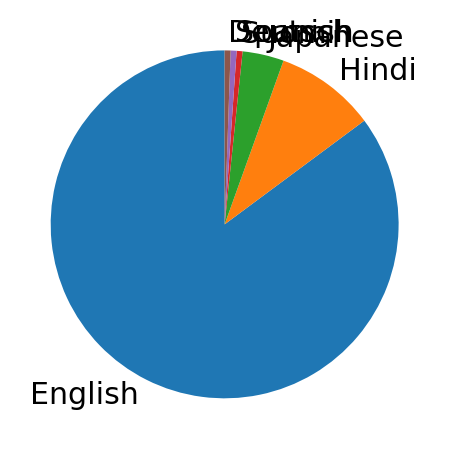

In [ ]:
fig = plt.figure(figsize = (12,8))

ax = plt.axes()

ax.pie(df2.values,labels = df2.index, startangle = 90)

g. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'

In [ ]:
df3 = df.replace(df[df["Language"] != "English"]["Language"].tolist(), "non English")
df3

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


h. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni

In [ ]:
import numpy as np

In [ ]:
df4 = df3.groupby(["Year of release", "Language"]).count().tail(17)["Name of the show"].unstack()
df4

Language,English,non English
Year of release,,
2011.0,4.0,NaN
2012.0,6.0,NaN
2013.0,4.0,NaN
2014.0,9.0,1.0
2015.0,12.0,3.0
2016.0,28.0,2.0
2017.0,23.0,1.0
2018.0,12.0,8.0
2019.0,15.0,9.0


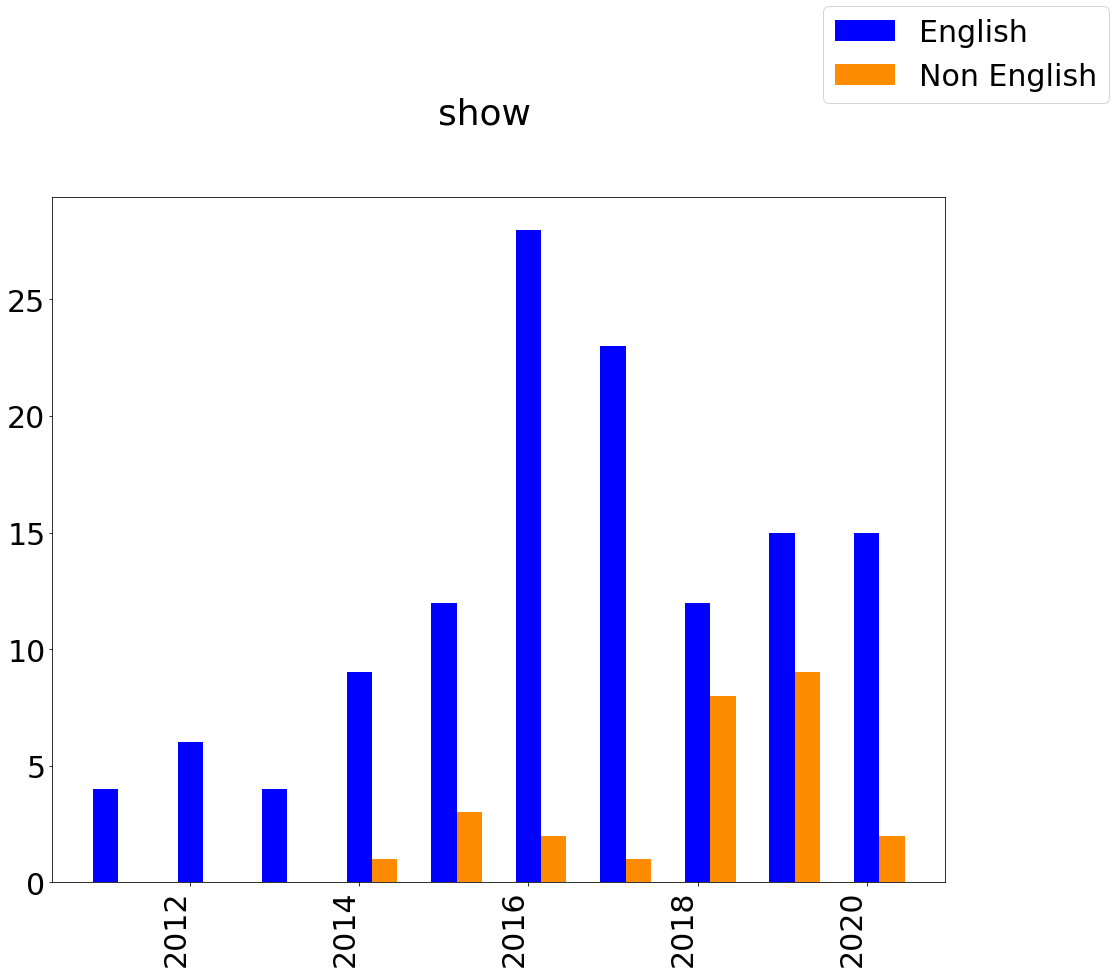

In [ ]:
df4 = df3.groupby(["Year of release", "Language"]).count().tail(17)["Name of the show"].unstack()
df4

plt.rcParams.update({"font.size" : 30})

labels = list(df4.index)
x = np.arange(len(labels))  # the label locations

fig = plt.figure(figsize=(16,14)) 
ax = plt.axes()
ax.bar(df4.index,df4["English"],label="English",width=0.3,color="blue")
ax.bar(df4.index+0.3,df4["non English"],label="Non English",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)

ax.legend(bbox_to_anchor=(1.2, 1.3))

fig.suptitle("show")

plt.show()